In [6]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Let's conduct an EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
data = pd.read_csv("Churn_Modelling.csv")


In [11]:
data.head()


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [12]:
data.describe()


RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [13]:
data.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

- RowNumber - Table Id value, a unique number for each row
- CustomerId - Customer Id value, a unique number for each customer
- Surname - Customer Surname
- CreditScore - Customer Credit Score, a number that represents the risk a borrower poses to a lender
- Geography - Customer Country, where the customer lives
- Gender - Customer Gender
- Age - Customer Age
- Tenure - Customer Tenure, number of months that the customer has been with the bank
- Balance - Customer Balance, the amount of money that the customer has
- NumOfProducts - Number of products that the customer has
- HasCrCard - Customer Credit Card, whether the customer has a credit card or not
- IsActiveMember - Customer Active Member, whether the customer is an active member or not
- EstimatedSalary - Customer Estimated Salary, the estimated salary of the customer
- Exited - Customer Exited, whether the customer left the bank or not

How many countries are in dataset?

In [14]:
data["Geography"].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- This is a dataset of 10,000 rows.
- No missing values.

## Let's extract useful columns:

In [16]:
distinct_columns = ["RowNumber", "CustomerId", "Surname"] # unique value columns - useless for our model
data = data.drop(columns=distinct_columns) # drop useless columns


In [17]:
categorical_columns = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"] # columns with discrete values
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"] # columns with continuous values

target_column = ['Exited'] # column for prediction


<Axes: title={'center': 'Exited'}, ylabel='count'>

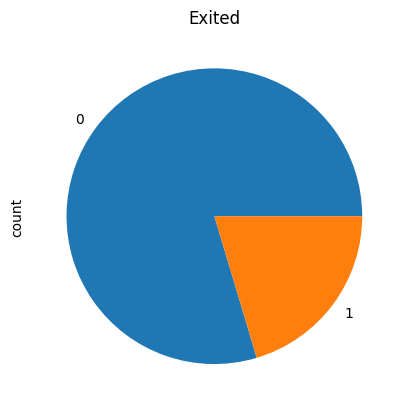

In [18]:
data["Exited"].value_counts().plot(kind="pie", title="Exited") # plot distribution of target variable


That would mean we will have do deal with class imbalance. Better to use f1_weighted score as well.

In [19]:
data[categorical_columns].head()


Geography  Gender  HasCrCard  IsActiveMember  Exited
0    France  Female          1               1       1
1     Spain  Female          0               1       0
2    France  Female          1               0       1
3    France  Female          0               0       0
4     Spain  Female          1               1       0

In [20]:
data[numerical_columns].head()


CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary
0          619   42       2       0.00              1        101348.88
1          608   41       1   83807.86              1        112542.58
2          502   42       8  159660.80              3        113931.57
3          699   39       1       0.00              2         93826.63
4          850   43       2  125510.82              1         79084.10

## Let's see value distributions:

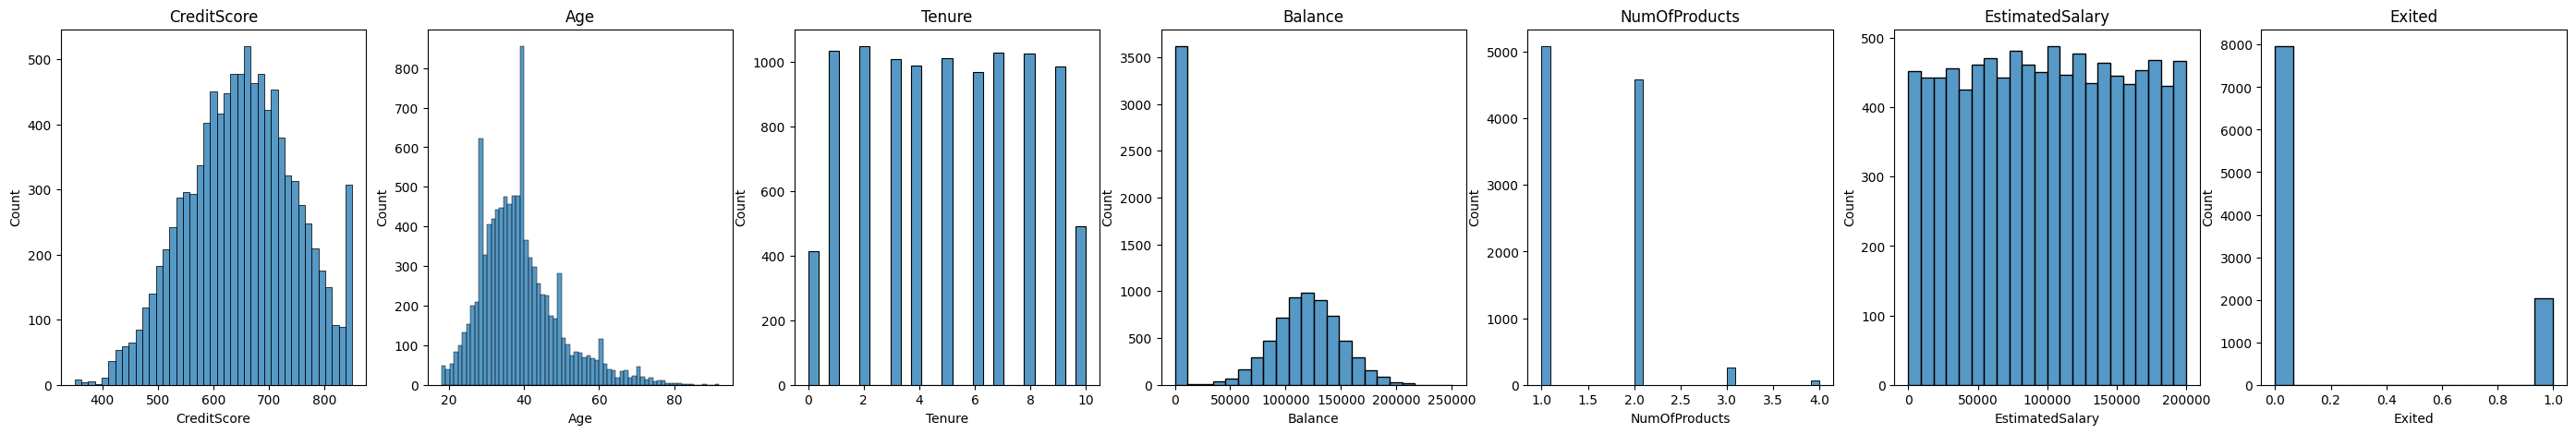

In [21]:
columns = numerical_columns + target_column
fig, ax = plt.subplots(1, len(columns), figsize=(5 * len(columns), 5))
for i in range(len(columns)):
    sns.histplot(data[columns[i]], ax=ax[i])
    ax[i].set_title(columns[i])
plt.show()


There are some outliers visible.

## Let's check for outliers:

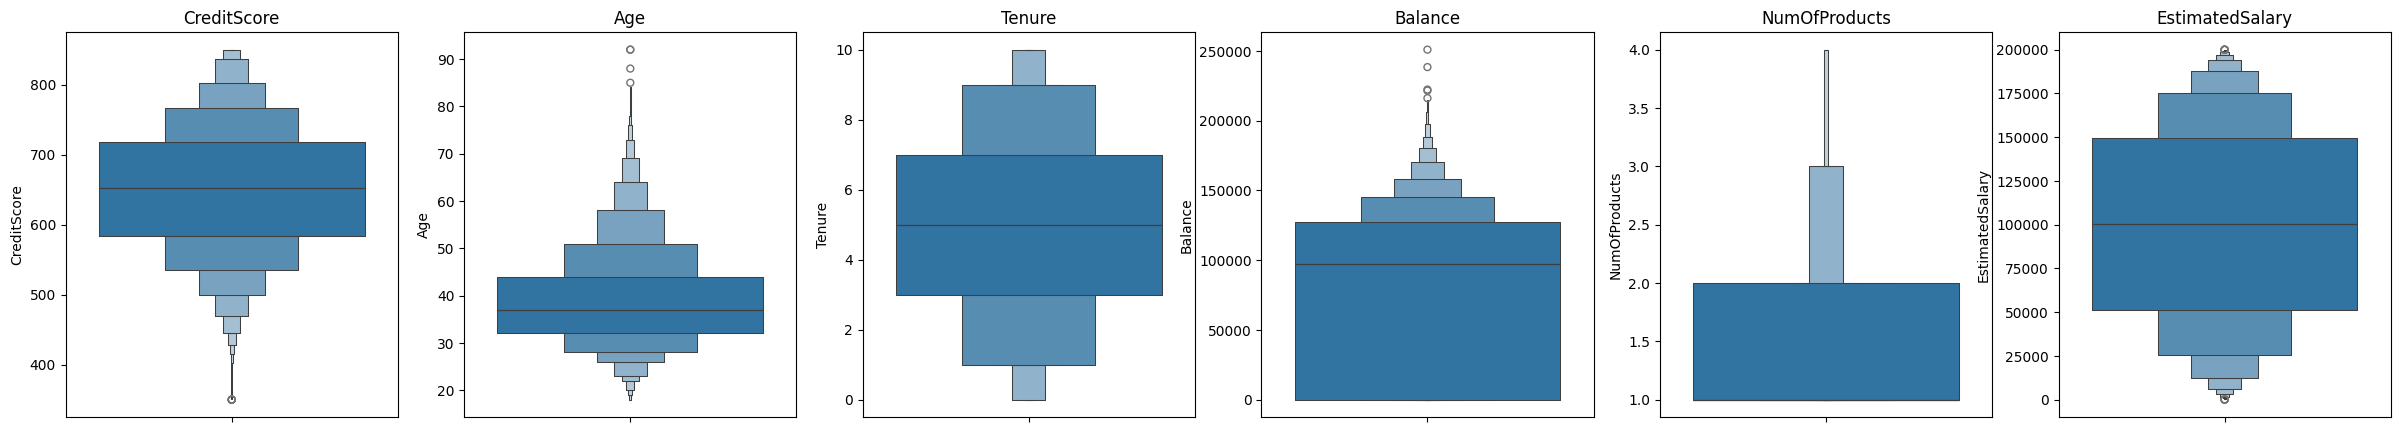

In [22]:
fig, ax = plt.subplots(1, len(numerical_columns), figsize=(5 * len(numerical_columns), 5))
for i in range(len(numerical_columns)):
    sns.boxenplot(data[numerical_columns[i]], ax=ax[i])
    ax[i].set_title(numerical_columns[i])
plt.show()


There are indeed some, let's remove them.

In [23]:
columns_with_outliers = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# Calculate Z-scores
z_scores = np.abs((data[columns_with_outliers] - data[columns_with_outliers].mean()) / data[columns_with_outliers].std())
# Define a threshold for Z-scores
threshold = 2.5
# Remove rows with outliers
data[columns_with_outliers] = data[columns_with_outliers][(z_scores < threshold).all(axis=1)]


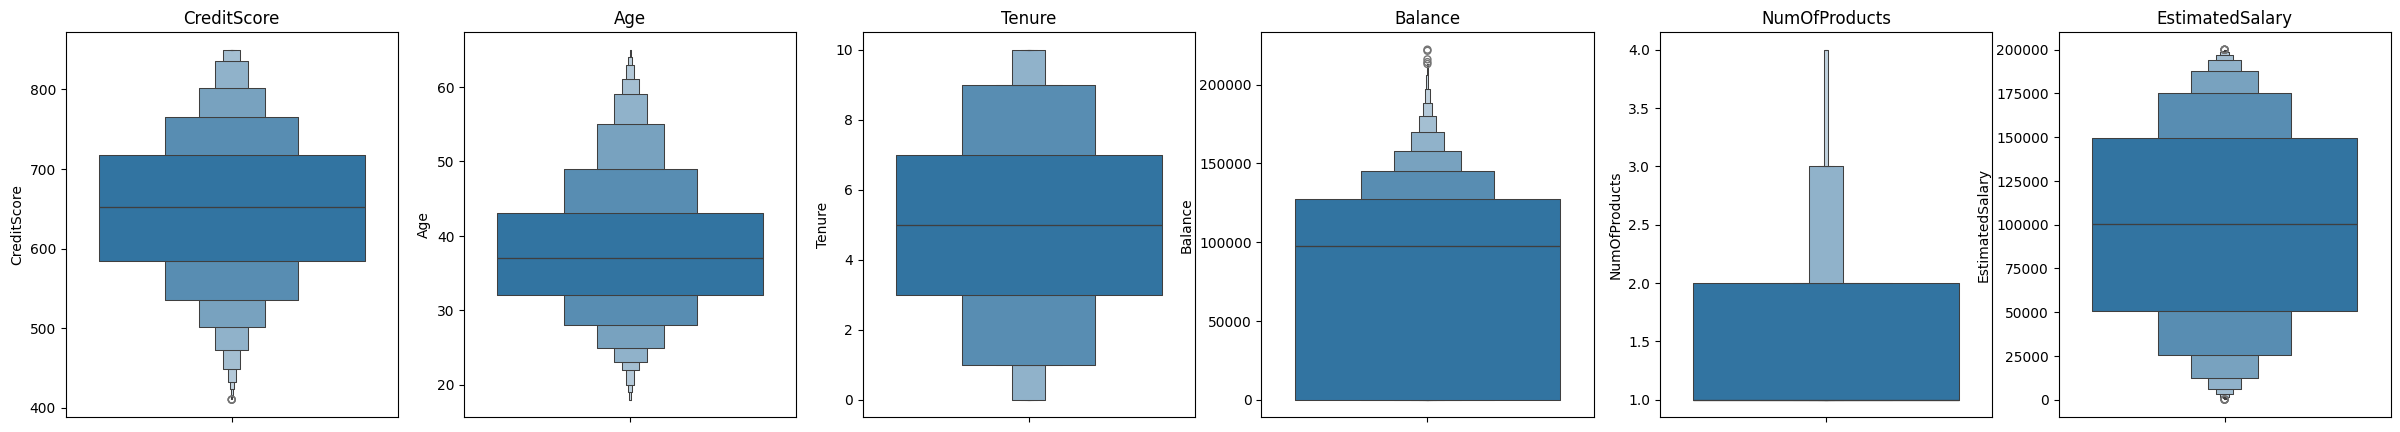

In [24]:
fig, ax = plt.subplots(1, len(numerical_columns), figsize=(5 * len(numerical_columns), 5))
for i in range(len(numerical_columns)):
    sns.boxenplot(data[numerical_columns[i]], ax=ax[i])
    ax[i].set_title(numerical_columns[i])
plt.show()


Result:

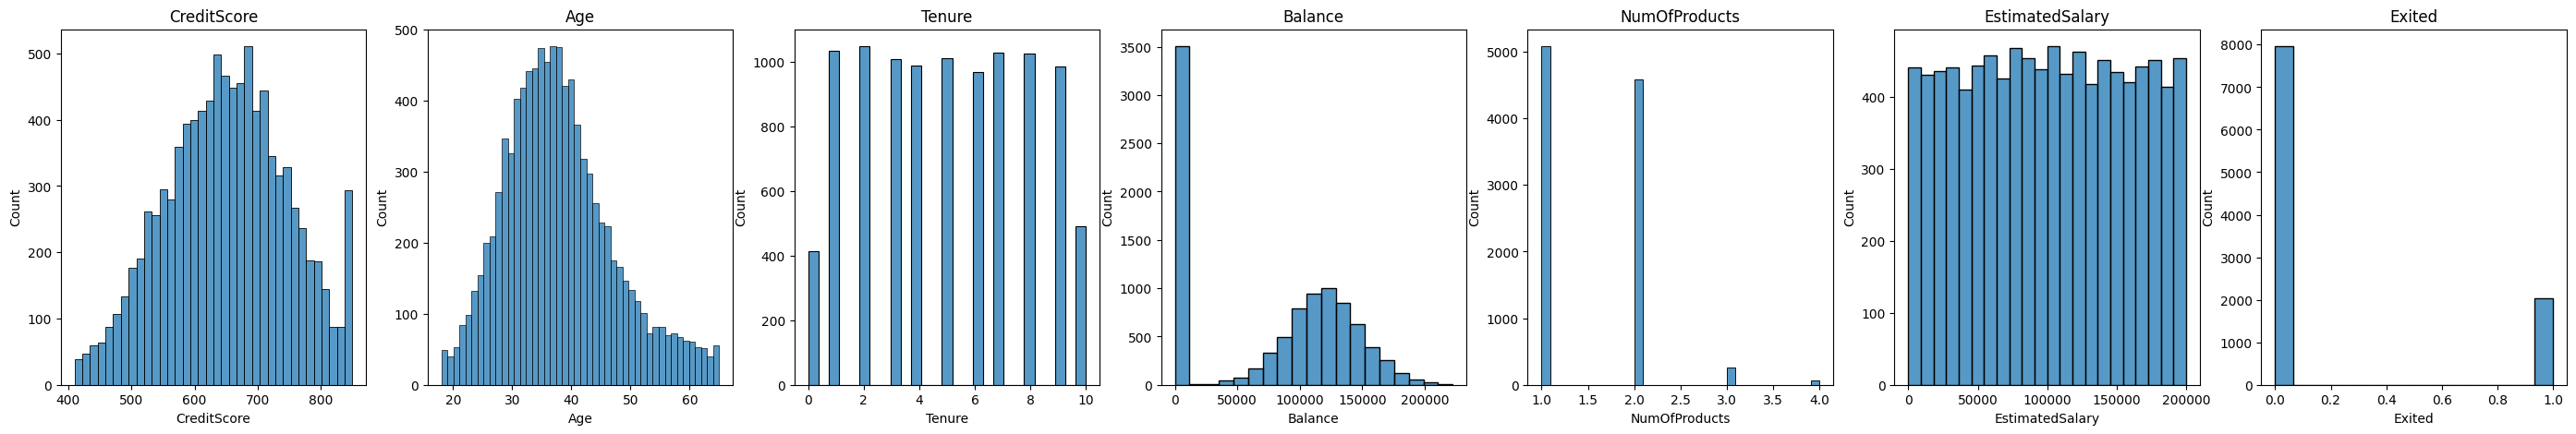

In [25]:
columns = numerical_columns + target_column
fig, ax = plt.subplots(1, len(columns), figsize=(5 * len(columns), 5))
for i in range(len(columns)):
    sns.histplot(data[columns[i]], ax=ax[i])
    ax[i].set_title(columns[i])
plt.show()


Speaking of, those graphs look almost normally distributed, so no need to correct here.

## Correlations:

### Let's see correlations for numerical values:

<Axes: >

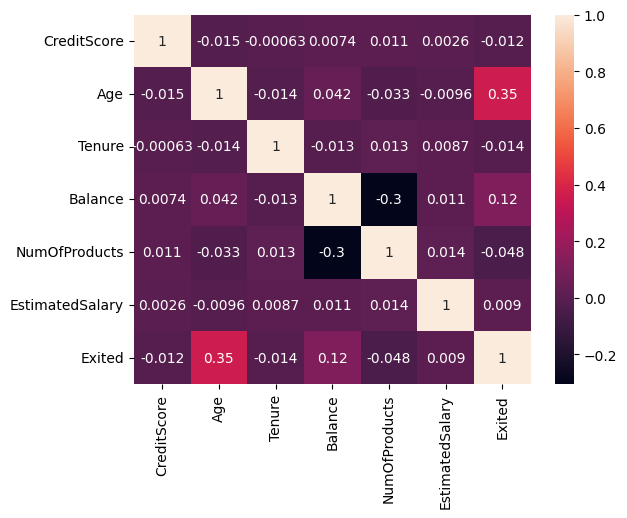

In [26]:
sns.heatmap(data[numerical_columns + target_column].corr(), annot=True)


There is some negative correlation between balance and num of products, but otherwise nothing obvious.

Among all, Age and Balance correlate the most with Target column.

In [27]:
data[["Age", "Balance", "Exited"]].groupby("Exited").describe()


Age                                                    Balance  \
         count       mean       std   min   25%   50%   75%   max   count   
Exited                                                                      
0       7732.0  36.397439  8.326289  18.0  31.0  36.0  41.0  65.0  7732.0   
1       1977.0  44.414770  9.286213  18.0  38.0  45.0  51.0  65.0  1977.0   

                                                                            \
                mean           std  min       25%         50%          75%   
Exited                                                                       
0       72880.150468  62831.617325  0.0      0.00   92234.695  126481.9575   
1       90992.174183  58224.470180  0.0  38340.02  109172.880  131394.5600   

                   
              max  
Exited             
0       221532.80  
1       222267.63

People who exited are slightly older and have a slightly higher balance than others.

### Now, categorical:

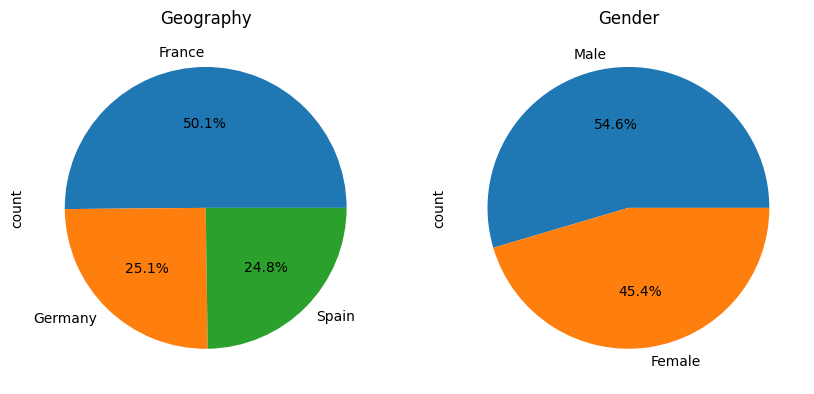

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
data["Geography"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax[0])
ax[0].set_title("Geography")
data["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax[1])
ax[1].set_title("Gender")
plt.show()


Half of the customers are from France, but otherwise nothing of interest here.

Let's encode text columns to check correlation.

In [29]:
Geography_encoded = data["Geography"].map({"France": 0, "Spain": 1, "Germany": 2})
Gender_encoded = data["Gender"].map({"Male": 0, "Female": 1})


In [30]:
categorical_encoded = pd.DataFrame([Geography_encoded, Gender_encoded]).T.join(data[['HasCrCard', 'IsActiveMember', 'Exited']])


<Axes: >

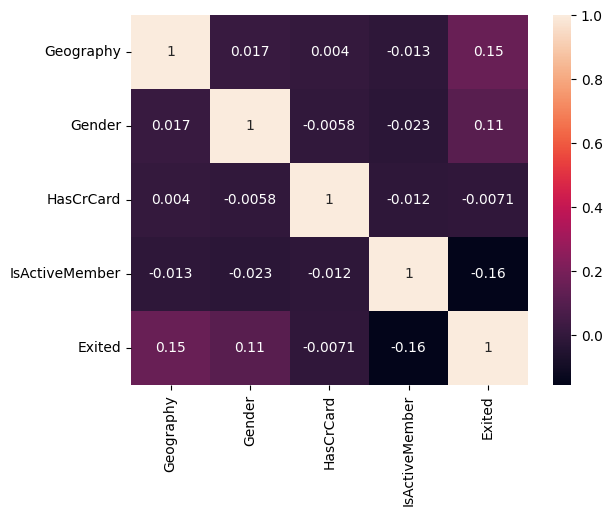

In [31]:
sns.heatmap(categorical_encoded.corr(), annot=True)


We can see that Geography and Gender has some weak correlation with Target, and Being active member the most.

## Conclusions:

- This is a dataset of 10,000 rows.
- No missing values.
- RowNumber, CustomerId, Surname columns have unique or useless values and can be removed.
- Exited is a target column, and it has class imbalance.
- There are outliers in Age, Balance and CreditScore features. They can be removed.
- There are some correlations between features, and with target, but none worth removing.

# Feature pre-processing and Engineering:

In [34]:
df = pd.read_csv("Churn_Modelling.csv")


Let's remove unnecesary columns:

In [35]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)


Are there columns that can be created?

We can see that there is a significant number of people with 0.0 balance. We can make it a new feature.

In [36]:
df["EmptyBalance"] = (df["Balance"] == 0).astype(int)


Let's encode text categorical values.

In [37]:
Geography_dummies = pd.get_dummies(df["Geography"]).astype(int)
Gender_dummies = pd.get_dummies(df["Gender"]).astype(int)


In [38]:
df.drop(columns=["Geography", "Gender"], inplace=True)
df = df.join(Geography_dummies).join(Gender_dummies)


Let's split data now

In [39]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Exited"])


Let's remove outliers:

In [40]:
outlier_features = ["Age", "Balance", "CreditScore"]


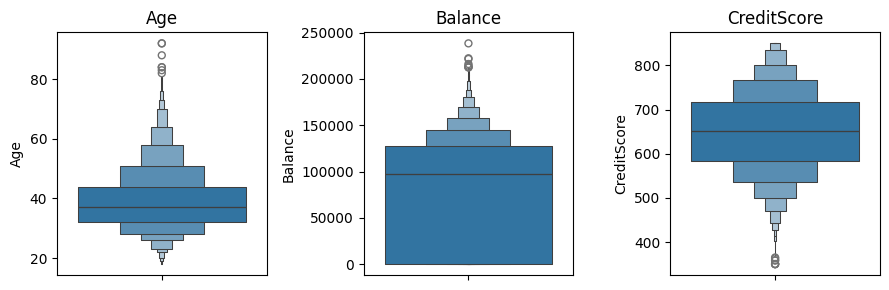

In [41]:
fig, ax = plt.subplots(1, len(outlier_features), figsize=(3 * len(outlier_features), 3))
for i in range(len(outlier_features)):
    sns.boxenplot(df_train[outlier_features[i]], ax=ax[i])
    ax[i].set_title(outlier_features[i])
plt.tight_layout()
plt.show()


In [42]:
# Calculate Z-scores
z_scores = np.abs((df_train[outlier_features] - df_train[outlier_features].mean()) / df_train[outlier_features].std())

# Define a threshold for Z-scores
threshold = 2

# Remove rows with outliers
df_train_no_outliers = df_train[df_train.index.isin(df_train[outlier_features][(z_scores < threshold).all(axis=1)].index)]


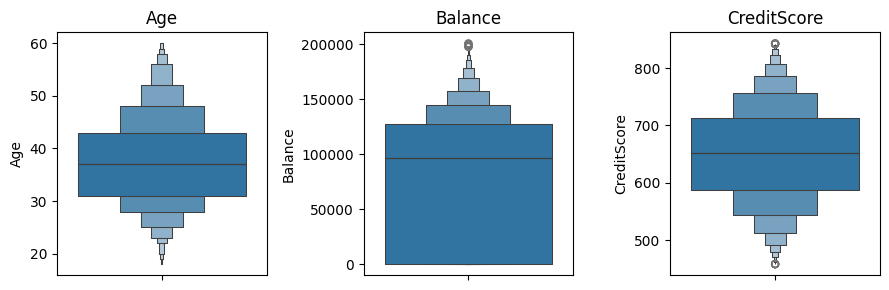

In [43]:
fig, ax = plt.subplots(1, len(outlier_features), figsize=(3 * len(outlier_features), 3))
for i in range(len(outlier_features)):
    sns.boxenplot(df_train_no_outliers[outlier_features[i]], ax=ax[i])
    ax[i].set_title(outlier_features[i])
plt.tight_layout()
plt.show()


Outliers are no longer noticeable.

Let's split data into features and targets

In [44]:
X_train = df_train.drop(columns=["Exited"])
y_train = df_train["Exited"]
X_test = df_test.drop(columns=["Exited"])
y_test = df_test["Exited"]

X_train_no_outliers = df_train_no_outliers.drop(columns=["Exited"])
y_train_no_outliers = df_train_no_outliers["Exited"]
X_test = df_test.drop(columns=["Exited"])
y_test = df_test["Exited"]


And let's scale the data

In [45]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train_no_outliers = scaler.transform(X_train_no_outliers)


# Modeling

Let's train a few different models to check for the best suitable.

First, lets set up a cross-validation

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from copy import deepcopy as copy

#  # to split classes equally
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### Let's set the baseline: median.

In [47]:
 # for sorting later

model_results_train = {}
model_results_test = {}
model_results_valid = {}

model_results_train_no_outliers = {}
model_results_test_no_outliers = {}
model_results_valid_no_outliers = {}

model_results_train_resampled = {}
model_results_test_resampled = {}
model_results_valid_resampled = {}

model_results_train_no_outliers_resampled = {}
model_results_test_no_outliers_resampled = {}
model_results_valid_no_outliers_resampled = {}


model_data = {}


In [48]:
from sklearn.base import BaseEstimator

# let's define basic pseudo-classifier for baseline
class baseline(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.median = int(y.median())
        return self

    def predict(self, X):
        return np.ones(len(X)) * self.median




model = baseline()
cvs = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1').mean()
cvsw = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted').mean()

print(f"f1 validation score: {cvs}\n")
print(f"f1 weighted validation score: {cvsw}\n")


f1 validation score: 0.0

f1 weighted validation score: 0.7059307585247042



So, we can get 70% accuracy just by choosing median from train results?

That's might be a result of class imbalance.

As for just f1, it's unusable.

Let's balance the training data.

In [49]:
from imblearn.over_sampling import RandomOverSampler

# we will use oversampling
rus = RandomOverSampler(random_state=42)
 # get balanced data for training
X_resampled_train, y_resampled_train = rus.fit_resample(X_train, y_train)
X_resampled_train_no_outliers, y_resampled_train_no_outliers = rus.fit_resample(X_train_no_outliers, y_train_no_outliers)


Now, we can see that on balanced data median is no different from random guess.

Anyway, let's get to real models.

In [50]:
def test_model(model, test_outliers=True, test_resampled=True):

    model_hash = hash(model)
    model_name = model.__class__.__name__ + "(" + str(model_hash) + ")" #
    model_params = model.get_params()
    model_data[model_name] = model_params

    # normal model
    model_normal = copy(model).fit(X_train, y_train)

    train_score = f1_score(y_train, model_normal.predict(X_train))
    model_results_train[model_name] = train_score
    print(f"f1 train score: {train_score:.4f}")

    train_score_weighted = f1_score(y_train, model_normal.predict(X_train), average='weighted')
    model_results_train[f"{model_name} (weighted)"] = train_score_weighted
    print(f"f1 weighted train score: {train_score_weighted:.4f}")

    test_score = f1_score(y_test, model_normal.predict(X_test))
    model_results_test[model_name] = test_score
    print(f"f1 test score: {test_score:.4f}")

    test_score_weighted = f1_score(y_test, model_normal.predict(X_test), average='weighted')
    model_results_test[f"{model_name} (weighted)"] = test_score_weighted
    print(f"f1 weighted test score: {test_score_weighted:.4f}")

    valid_score = cross_val_score(model_normal, X_train, y_train, cv=cv, scoring='f1').mean()
    model_results_valid[model_name] = valid_score
    print(f"f1 validation score: {valid_score:.4f}")

    valid_score_weighted = cross_val_score(model_normal, X_train, y_train, cv=cv, scoring='f1_weighted').mean()
    model_results_valid[f"{model_name} (weighted)"] = valid_score_weighted
    print(f"f1 weighted validation score: {valid_score_weighted:.4f}\n")

    if test_outliers:
        # no outliers model
        model_normal = copy(model).fit(X_train_no_outliers, y_train_no_outliers)

        train_score = f1_score(y_train_no_outliers, model_normal.predict(X_train_no_outliers))
        model_results_train_no_outliers[model_name] = train_score
        print(f"f1 train score (no outliers): {train_score:.4f}")

        train_score_weighted = f1_score(y_train_no_outliers, model_normal.predict(X_train_no_outliers), average='weighted')
        model_results_train_no_outliers[f"{model_name} (weighted)"] = train_score_weighted
        print(f"f1 weighted train score (no outliers): {train_score_weighted:.4f}")

        test_score = f1_score(y_test, model_normal.predict(X_test))
        model_results_test_no_outliers[model_name] = test_score
        print(f"f1 test score (no outliers): {test_score:.4f}")

        test_score_weighted = f1_score(y_test, model_normal.predict(X_test), average='weighted')
        model_results_test_no_outliers[f"{model_name} (weighted)"] = test_score_weighted
        print(f"f1 weighted test score (no outliers): {test_score_weighted:.4f}")

        valid_score = cross_val_score(model_normal, X_train_no_outliers, y_train_no_outliers, cv=cv, scoring='f1').mean()
        model_results_valid_no_outliers[model_name] = valid_score
        print(f"f1 validation score (no outliers): {valid_score:.4f}")

        valid_score_weighted = cross_val_score(model_normal, X_train_no_outliers, y_train_no_outliers, cv=cv, scoring='f1_weighted').mean()
        model_results_valid_no_outliers[f"{model_name} (weighted)"] = valid_score_weighted
        print(f"f1 weighted validation score (no outliers): {valid_score_weighted:.4f}\n")

    if test_resampled:
        # resampled model
        model_normal = copy(model).fit(X_resampled_train, y_resampled_train)

        train_score = f1_score(y_resampled_train, model_normal.predict(X_resampled_train))
        model_results_train_resampled[model_name] = train_score
        print(f"f1 train score (resampled): {train_score:.4f}")

        train_score_weighted = f1_score(y_resampled_train, model_normal.predict(X_resampled_train), average='weighted')
        model_results_train_resampled[f"{model_name} (weighted)"] = train_score_weighted
        print(f"f1 weighted train score (resampled): {train_score_weighted:.4f}")

        test_score = f1_score(y_test, model_normal.predict(X_test))
        model_results_test_resampled[model_name] = test_score
        print(f"f1 test score (resampled): {test_score:.4f}")

        test_score_weighted = f1_score(y_test, model_normal.predict(X_test), average='weighted')
        model_results_test_resampled[f"{model_name} (weighted)"] = test_score_weighted
        print(f"f1 weighted test score (resampled): {test_score_weighted:.4f}")

        valid_score = cross_val_score(model_normal, X_resampled_train, y_resampled_train, cv=cv, scoring='f1').mean()
        model_results_valid_resampled[model_name] = valid_score
        print(f"f1 validation score (resampled): {valid_score:.4f}")

        valid_score_weighted = cross_val_score(model_normal, X_resampled_train, y_resampled_train, cv=cv, scoring='f1_weighted').mean()
        model_results_valid_resampled[f"{model_name} (weighted)"] = valid_score_weighted
        print(f"f1 weighted validation score (resampled): {valid_score_weighted:.4f}\n")

    if test_resampled and test_outliers:
        # resampled no outliers model
        model_normal = copy(model).fit(X_resampled_train_no_outliers, y_resampled_train_no_outliers)

        train_score = f1_score(y_resampled_train_no_outliers, model_normal.predict(X_resampled_train_no_outliers))
        model_results_train_no_outliers_resampled[model_name] = train_score
        print(f"f1 train score (no outliers, resampled): {train_score:.4f}")

        train_score_weighted = f1_score(y_resampled_train_no_outliers, model_normal.predict(X_resampled_train_no_outliers), average='weighted')
        model_results_train_no_outliers_resampled[f"{model_name} (weighted)"] = train_score_weighted
        print(f"f1 weighted train score (no outliers, resampled): {train_score_weighted:.4f}")

        test_score = f1_score(y_test, model_normal.predict(X_test))
        model_results_test_no_outliers_resampled[model_name] = test_score
        print(f"f1 test score (no outliers, resampled): {test_score:.4f}")

        test_score_weighted = f1_score(y_test, model_normal.predict(X_test), average='weighted')
        model_results_test_no_outliers_resampled[f"{model_name} (weighted)"] = test_score_weighted
        print(f"f1 weighted test score (no outliers, resampled): {test_score_weighted:.4f}")

        valid_score = cross_val_score(model_normal, X_resampled_train_no_outliers, y_resampled_train_no_outliers, cv=cv, scoring='f1').mean()
        model_results_valid_no_outliers_resampled[model_name] = valid_score
        print(f"f1 validation score (no outliers, resampled): {valid_score:.4f}")

        valid_score_weighted = cross_val_score(model_normal, X_resampled_train_no_outliers, y_resampled_train_no_outliers, cv=cv, scoring='f1_weighted').mean()
        model_results_valid_no_outliers_resampled[f"{model_name} (weighted)"] = valid_score_weighted
        print(f"f1 weighted validation score (no outliers, resampled): {valid_score_weighted:.4f}\n")


### LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression

# Since we got class imbalance, let's use balanced class weights
model = LogisticRegression(random_state=42, class_weight='balanced')

test_model(model)


f1 train score: 0.4919
f1 weighted train score: 0.7349
f1 test score: 0.4991
f1 weighted test score: 0.7371
f1 validation score: 0.4881
f1 weighted validation score: 0.7328

f1 train score (no outliers): 0.5080
f1 weighted train score (no outliers): 0.7485
f1 test score (no outliers): 0.5105
f1 weighted test score (no outliers): 0.7359
f1 validation score (no outliers): 0.5041
f1 weighted validation score (no outliers): 0.7461

f1 train score (resampled): 0.6984
f1 weighted train score (resampled): 0.7022
f1 test score (resampled): 0.5035
f1 weighted test score (resampled): 0.7398
f1 validation score (resampled): 0.6976
f1 weighted validation score (resampled): 0.7016

f1 train score (no outliers, resampled): 0.7220
f1 weighted train score (no outliers, resampled): 0.7229
f1 test score (no outliers, resampled): 0.5097
f1 weighted test score (no outliers, resampled): 0.7350
f1 validation score (no outliers, resampled): 0.7219
f1 weighted validation score (no outliers, resampled): 0.7227

Polynomial gives high base score, but the speed is absolutely awful.

### RidgeClassifier

In [52]:
from sklearn.linear_model import RidgeClassifier


model = RidgeClassifier(random_state=42)
test_model(model)


f1 train score: 0.2020
f1 weighted train score: 0.7497
f1 test score: 0.1917
f1 weighted test score: 0.7477
f1 validation score: 0.2055
f1 weighted validation score: 0.7507

f1 train score (no outliers): 0.3038
f1 weighted train score (no outliers): 0.7817
f1 test score (no outliers): 0.3004
f1 weighted test score (no outliers): 0.7658
f1 validation score (no outliers): 0.2978
f1 weighted validation score (no outliers): 0.7803

f1 train score (resampled): 0.6963
f1 weighted train score (resampled): 0.7015
f1 test score (resampled): 0.5022
f1 weighted test score (resampled): 0.7408
f1 validation score (resampled): 0.6949
f1 weighted validation score (resampled): 0.7001

f1 train score (no outliers, resampled): 0.7210
f1 weighted train score (no outliers, resampled): 0.7228
f1 test score (no outliers, resampled): 0.5097
f1 weighted test score (no outliers, resampled): 0.7366
f1 validation score (no outliers, resampled): 0.7217
f1 weighted validation score (no outliers, resampled): 0.7235

### SVC

In [53]:
from sklearn.svm import SVC


model = SVC(kernel="linear", random_state=42)
test_model(model)


f1 train score: 0.0000
f1 weighted train score: 0.7059
f1 test score: 0.0000
f1 weighted test score: 0.7063
f1 validation score: 0.0000
f1 weighted validation score: 0.7059

f1 train score (no outliers): 0.0000
f1 weighted train score (no outliers): 0.7122
f1 test score (no outliers): 0.0000
f1 weighted test score (no outliers): 0.7063
f1 validation score (no outliers): 0.0000
f1 weighted validation score (no outliers): 0.7122

f1 train score (resampled): 0.7070
f1 weighted train score (resampled): 0.7103
f1 test score (resampled): 0.5074
f1 weighted test score (resampled): 0.7428
f1 validation score (resampled): 0.7048
f1 weighted validation score (resampled): 0.7090

f1 train score (no outliers, resampled): 0.7221
f1 weighted train score (no outliers, resampled): 0.7246
f1 test score (no outliers, resampled): 0.5128
f1 weighted test score (no outliers, resampled): 0.7404
f1 validation score (no outliers, resampled): 0.7200
f1 weighted validation score (no outliers, resampled): 0.7233

In [54]:
from sklearn.svm import SVC


model = SVC(kernel="rbf", random_state=42)
test_model(model)


f1 train score: 0.3737
f1 weighted train score: 0.7984
f1 test score: 0.3273
f1 weighted test score: 0.7864
f1 validation score: 0.3147
f1 weighted validation score: 0.7824

f1 train score (no outliers): 0.3044
f1 weighted train score (no outliers): 0.7851
f1 test score (no outliers): 0.3227
f1 weighted test score (no outliers): 0.7848
f1 validation score (no outliers): 0.2598
f1 weighted validation score (no outliers): 0.7733

f1 train score (resampled): 0.7713
f1 weighted train score (resampled): 0.7759
f1 test score (resampled): 0.5590
f1 weighted test score (resampled): 0.7878
f1 validation score (resampled): 0.7553
f1 weighted validation score (resampled): 0.7609

f1 train score (no outliers, resampled): 0.7863
f1 weighted train score (no outliers, resampled): 0.7865
f1 test score (no outliers, resampled): 0.5345
f1 weighted test score (no outliers, resampled): 0.7593
f1 validation score (no outliers, resampled): 0.7677
f1 weighted validation score (no outliers, resampled): 0.7691

In [55]:
from sklearn.svm import SVC


model = SVC(kernel="sigmoid", random_state=42)
test_model(model)


f1 train score: 0.2495
f1 weighted train score: 0.6949
f1 test score: 0.2605
f1 weighted test score: 0.7009
f1 validation score: 0.2653
f1 weighted validation score: 0.7019

f1 train score (no outliers): 0.2417
f1 weighted train score (no outliers): 0.6988
f1 test score (no outliers): 0.2578
f1 weighted test score (no outliers): 0.7014
f1 validation score (no outliers): 0.2390
f1 weighted validation score (no outliers): 0.6968

f1 train score (resampled): 0.5284
f1 weighted train score (resampled): 0.5287
f1 test score (resampled): 0.2984
f1 weighted test score (resampled): 0.5648
f1 validation score (resampled): 0.5371
f1 weighted validation score (resampled): 0.5336

f1 train score (no outliers, resampled): 0.5501
f1 weighted train score (no outliers, resampled): 0.5486
f1 test score (no outliers, resampled): 0.3312
f1 weighted test score (no outliers, resampled): 0.5842
f1 validation score (no outliers, resampled): 0.5297
f1 weighted validation score (no outliers, resampled): 0.5315

In [56]:
from sklearn.svm import SVC


model = SVC(kernel="poly", degree=5, random_state=42)
test_model(model)


f1 train score: 0.5876
f1 weighted train score: 0.8553
f1 test score: 0.5083
f1 weighted test score: 0.8300
f1 validation score: 0.5112
f1 weighted validation score: 0.8295

f1 train score (no outliers): 0.5781
f1 weighted train score (no outliers): 0.8553
f1 test score (no outliers): 0.5113
f1 weighted test score (no outliers): 0.8294
f1 validation score (no outliers): 0.4967
f1 weighted validation score (no outliers): 0.8290

f1 train score (resampled): 0.8337
f1 weighted train score (resampled): 0.8321
f1 test score (resampled): 0.5661
f1 weighted test score (resampled): 0.7922
f1 validation score (resampled): 0.8093
f1 weighted validation score (resampled): 0.8073

f1 train score (no outliers, resampled): 0.8374
f1 weighted train score (no outliers, resampled): 0.8338
f1 test score (no outliers, resampled): 0.5344
f1 weighted test score (no outliers, resampled): 0.7665
f1 validation score (no outliers, resampled): 0.8101
f1 weighted validation score (no outliers, resampled): 0.8064

### SGDClassifier

In [57]:
from sklearn.linear_model import SGDClassifier


model = SGDClassifier(random_state=42)
test_model(model)


f1 train score: 0.0024
f1 weighted train score: 0.7064
f1 test score: 0.0000
f1 weighted test score: 0.7063
f1 validation score: 0.0024
f1 weighted validation score: 0.7064

f1 train score (no outliers): 0.3720
f1 weighted train score (no outliers): 0.7948
f1 test score (no outliers): 0.3607
f1 weighted test score (no outliers): 0.7763
f1 validation score (no outliers): 0.2764
f1 weighted validation score (no outliers): 0.7716

f1 train score (resampled): 0.6758
f1 weighted train score (resampled): 0.6965
f1 test score (resampled): 0.5128
f1 weighted test score (resampled): 0.7622
f1 validation score (resampled): 0.6949
f1 weighted validation score (resampled): 0.7049

f1 train score (no outliers, resampled): 0.7075
f1 weighted train score (no outliers, resampled): 0.7172
f1 test score (no outliers, resampled): 0.5095
f1 weighted test score (no outliers, resampled): 0.7402
f1 validation score (no outliers, resampled): 0.7228
f1 weighted validation score (no outliers, resampled): 0.7142

### KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
test_model(model)


f1 train score: 0.5690
f1 weighted train score: 0.8470
f1 test score: 0.4006
f1 weighted test score: 0.7906
f1 validation score: 0.3827
f1 weighted validation score: 0.7849

f1 train score (no outliers): 0.5497
f1 weighted train score (no outliers): 0.8447
f1 test score (no outliers): 0.3909
f1 weighted test score (no outliers): 0.7881
f1 validation score (no outliers): 0.3440
f1 weighted validation score (no outliers): 0.7800

f1 train score (resampled): 0.8992
f1 weighted train score (resampled): 0.8910
f1 test score (resampled): 0.4665
f1 weighted test score (resampled): 0.7351
f1 validation score (resampled): 0.8152
f1 weighted validation score (resampled): 0.8013

f1 train score (no outliers, resampled): 0.9018
f1 weighted train score (no outliers, resampled): 0.8940
f1 test score (no outliers, resampled): 0.4656
f1 weighted test score (no outliers, resampled): 0.7316
f1 validation score (no outliers, resampled): 0.8220
f1 weighted validation score (no outliers, resampled): 0.8078

### GaussianNB

In [59]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()
test_model(model)


f1 train score: 0.4625
f1 weighted train score: 0.7927
f1 test score: 0.4630
f1 weighted test score: 0.7931
f1 validation score: 0.4581
f1 weighted validation score: 0.7907

f1 train score (no outliers): 0.4944
f1 weighted train score (no outliers): 0.8073
f1 test score (no outliers): 0.4772
f1 weighted test score (no outliers): 0.7874
f1 validation score (no outliers): 0.4872
f1 weighted validation score (no outliers): 0.8048

f1 train score (resampled): 0.6794
f1 weighted train score (resampled): 0.6863
f1 test score (resampled): 0.4602
f1 weighted test score (resampled): 0.7126
f1 validation score (resampled): 0.6795
f1 weighted validation score (resampled): 0.6861

f1 train score (no outliers, resampled): 0.7111
f1 weighted train score (no outliers, resampled): 0.7129
f1 test score (no outliers, resampled): 0.4853
f1 weighted test score (no outliers, resampled): 0.7137
f1 validation score (no outliers, resampled): 0.7113
f1 weighted validation score (no outliers, resampled): 0.7131

### DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=42)
test_model(model)


f1 train score: 1.0000
f1 weighted train score: 1.0000
f1 test score: 0.4940
f1 weighted test score: 0.7915
f1 validation score: 0.4867
f1 weighted validation score: 0.7881

f1 train score (no outliers): 1.0000
f1 weighted train score (no outliers): 1.0000
f1 test score (no outliers): 0.4946
f1 weighted test score (no outliers): 0.7900
f1 validation score (no outliers): 0.4745
f1 weighted validation score (no outliers): 0.7912

f1 train score (resampled): 1.0000
f1 weighted train score (resampled): 1.0000
f1 test score (resampled): 0.4747
f1 weighted test score (resampled): 0.7870
f1 validation score (resampled): 0.9208
f1 weighted validation score (resampled): 0.9155

f1 train score (no outliers, resampled): 1.0000
f1 weighted train score (no outliers, resampled): 1.0000
f1 test score (no outliers, resampled): 0.4742
f1 weighted test score (no outliers, resampled): 0.7860
f1 validation score (no outliers, resampled): 0.9209
f1 weighted validation score (no outliers, resampled): 0.9155

### RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42, n_estimators=100)
test_model(model)


f1 train score: 1.0000
f1 weighted train score: 1.0000
f1 test score: 0.5701
f1 weighted test score: 0.8462
f1 validation score: 0.5595
f1 weighted validation score: 0.8430

f1 train score (no outliers): 1.0000
f1 weighted train score (no outliers): 1.0000
f1 test score (no outliers): 0.5626
f1 weighted test score (no outliers): 0.8438
f1 validation score (no outliers): 0.5544
f1 weighted validation score (no outliers): 0.8448

f1 train score (resampled): 1.0000
f1 weighted train score (resampled): 1.0000
f1 test score (resampled): 0.5865
f1 weighted test score (resampled): 0.8411
f1 validation score (resampled): 0.9497
f1 weighted validation score (resampled): 0.9481

f1 train score (no outliers, resampled): 1.0000
f1 weighted train score (no outliers, resampled): 1.0000
f1 test score (no outliers, resampled): 0.5854
f1 weighted test score (no outliers, resampled): 0.8409
f1 validation score (no outliers, resampled): 0.9510
f1 weighted validation score (no outliers, resampled): 0.9493

Now, that's an amazing result, in comparison.

### GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier(random_state=42)
test_model(model)


f1 train score: 0.6100
f1 weighted train score: 0.8596
f1 test score: 0.6054
f1 weighted test score: 0.8571
f1 validation score: 0.5797
f1 weighted validation score: 0.8492

f1 train score (no outliers): 0.5969
f1 weighted train score (no outliers): 0.8594
f1 test score (no outliers): 0.5797
f1 weighted test score (no outliers): 0.8484
f1 validation score (no outliers): 0.5644
f1 weighted validation score (no outliers): 0.8479

f1 train score (resampled): 0.8040
f1 weighted train score (resampled): 0.8079
f1 test score (resampled): 0.6218
f1 weighted test score (resampled): 0.8213
f1 validation score (resampled): 0.7917
f1 weighted validation score (resampled): 0.7957

f1 train score (no outliers, resampled): 0.8092
f1 weighted train score (no outliers, resampled): 0.8113
f1 test score (no outliers, resampled): 0.5928
f1 weighted test score (no outliers, resampled): 0.8008
f1 validation score (no outliers, resampled): 0.7900
f1 weighted validation score (no outliers, resampled): 0.7930

### LGBMClassifier

In [63]:
from lightgbm.sklearn import LGBMClassifier


model = LGBMClassifier(verbosity=-1, random_state=42)
test_model(model)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


f1 train score: 0.7520
f1 weighted train score: 0.9080
f1 test score: 0.5782
f1 weighted test score: 0.8465
f1 validation score: 0.5857
f1 weighted validation score: 0.8477

f1 train score (no outliers): 0.7733
f1 weighted train score (no outliers): 0.9171
f1 test score (no outliers): 0.5663
f1 weighted test score (no outliers): 0.8421
f1 validation score (no outliers): 0.5626
f1 weighted validation score (no outliers): 0.8440

f1 train score (resampled): 0.9115
f1 weighted train score (resampled): 0.9103
f1 test score (resampled): 0.6101
f1 weighted test score (resampled): 0.8264
f1 validation score (resampled): 0.8673
f1 weighted validation score (resampled): 0.8654

f1 train score (no outliers, resampled): 0.9201
f1 weighted train score (no outliers, resampled): 0.9187
f1 test score (no outliers, resampled): 0.6206
f1 weighted test score (no outliers, resampled): 0.8298
f1 validation score (no outliers, resampled): 0.8793
f1 weighted validation score (no outliers, resampled): 0.8763

### XGBClassifier

In [64]:
from xgboost import XGBClassifier


model = XGBClassifier(random_state=42)
test_model(model)


f1 train score: 0.8993
f1 weighted train score: 0.9608
f1 test score: 0.5698
f1 weighted test score: 0.8421
f1 validation score: 0.5708
f1 weighted validation score: 0.8401

f1 train score (no outliers): 0.9121
f1 weighted train score (no outliers): 0.9664
f1 test score (no outliers): 0.5661
f1 weighted test score (no outliers): 0.8380
f1 validation score (no outliers): 0.5496
f1 weighted validation score (no outliers): 0.8367

f1 train score (resampled): 0.9666
f1 weighted train score (resampled): 0.9663
f1 test score (resampled): 0.6107
f1 weighted test score (resampled): 0.8377
f1 validation score (resampled): 0.9086
f1 weighted validation score (resampled): 0.9055

f1 train score (no outliers, resampled): 0.9784
f1 weighted train score (no outliers, resampled): 0.9782
f1 test score (no outliers, resampled): 0.5902
f1 weighted test score (no outliers, resampled): 0.8280
f1 validation score (no outliers, resampled): 0.9219
f1 weighted validation score (no outliers, resampled): 0.9187

## Results

In [65]:
model_results_train_no_outliers_sorted = dict(sorted(model_results_train_no_outliers.items(), key=lambda item: item[1], reverse=True))
model_results_test_no_outliers_sorted = dict(sorted(model_results_test_no_outliers.items(), key=lambda item: item[1], reverse=True))
model_results_valid_no_outliers_sorted = dict(sorted(model_results_valid_no_outliers.items(), key=lambda item: item[1], reverse=True))

model_results_test_sorted = dict(sorted(model_results_test.items(), key=lambda item: item[1], reverse=True))
model_results_train_sorted = dict(sorted(model_results_train.items(), key=lambda item: item[1], reverse=True))
model_results_valid_sorted = dict(sorted(model_results_valid.items(), key=lambda item: item[1], reverse=True))

model_results_train_resampled_sorted = dict(sorted(model_results_train_resampled.items(), key=lambda item: item[1], reverse=True))
model_results_test_resampled_sorted = dict(sorted(model_results_test_resampled.items(), key=lambda item: item[1], reverse=True))
model_results_valid_resampled_sorted = dict(sorted(model_results_valid_resampled.items(), key=lambda item: item[1], reverse=True))

model_results_train_no_outliers_resampled_sorted = dict(sorted(model_results_train_no_outliers_resampled.items(), key=lambda item: item[1], reverse=True))
model_results_test_no_outliers_resampled_sorted = dict(sorted(model_results_test_no_outliers_resampled.items(), key=lambda item: item[1], reverse=True))
model_results_valid_no_outliers_resampled_sorted = dict(sorted(model_results_valid_no_outliers_resampled.items(), key=lambda item: item[1], reverse=True))


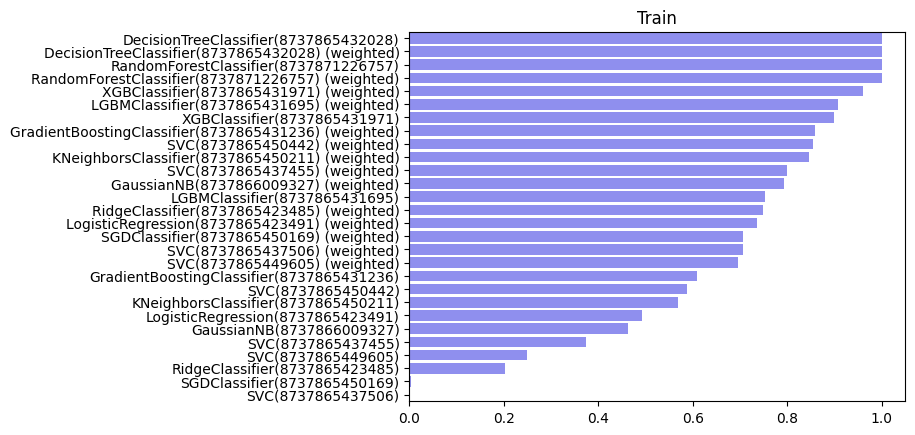

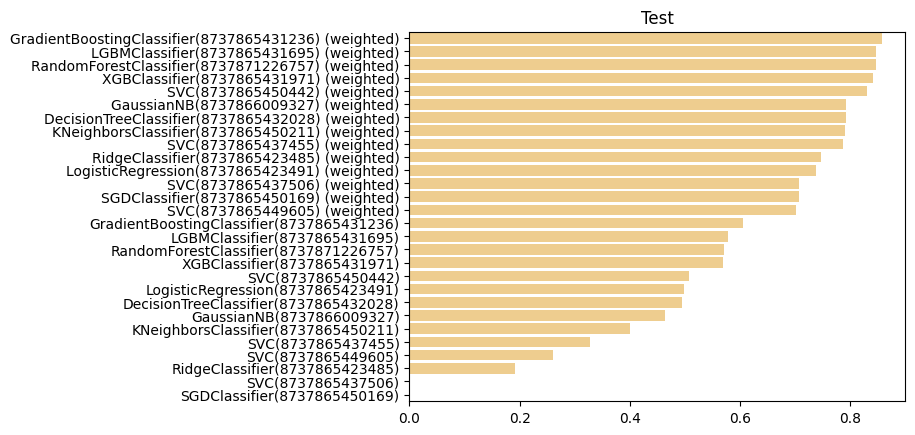

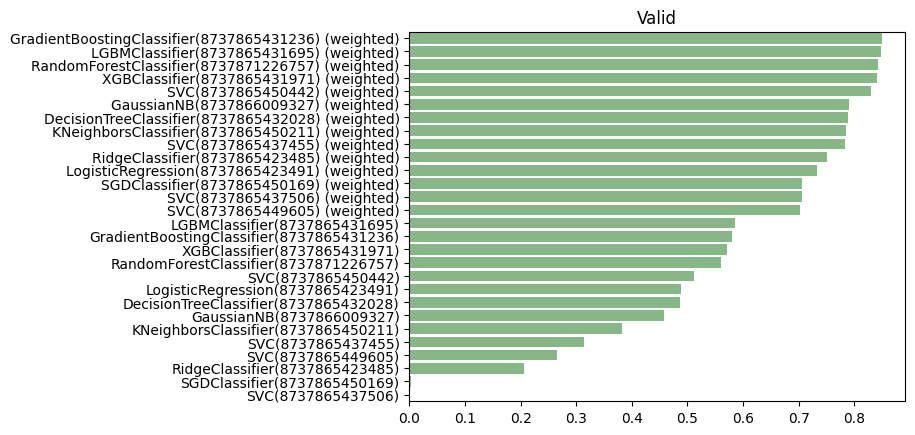

In [66]:
sns.barplot(model_results_train_sorted, orient="h", alpha=0.5, color='blue')
plt.title('Train')
plt.show()
sns.barplot(model_results_test_sorted, orient="h", alpha=0.5, color='orange')
plt.title('Test')
plt.show()
sns.barplot(model_results_valid_sorted, orient="h", alpha=0.5, color='green')
plt.title('Valid')
plt.show()


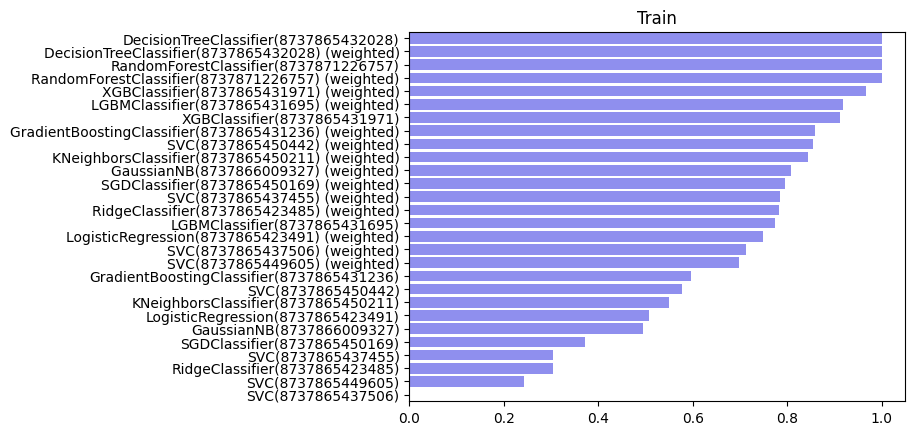

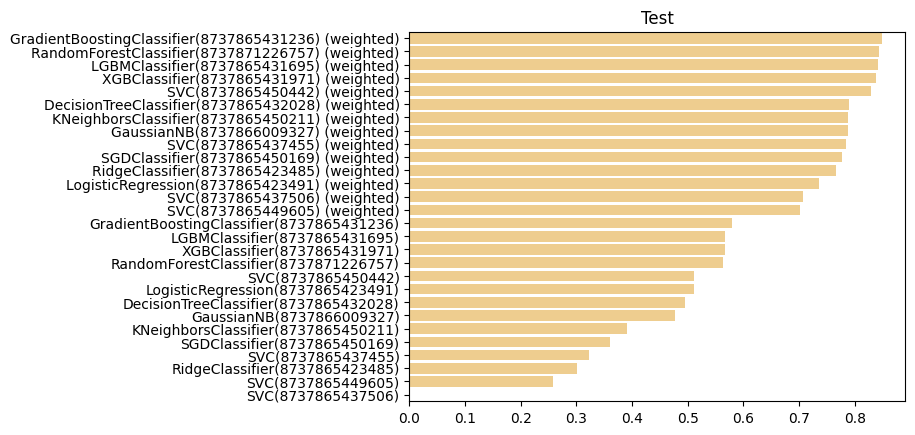

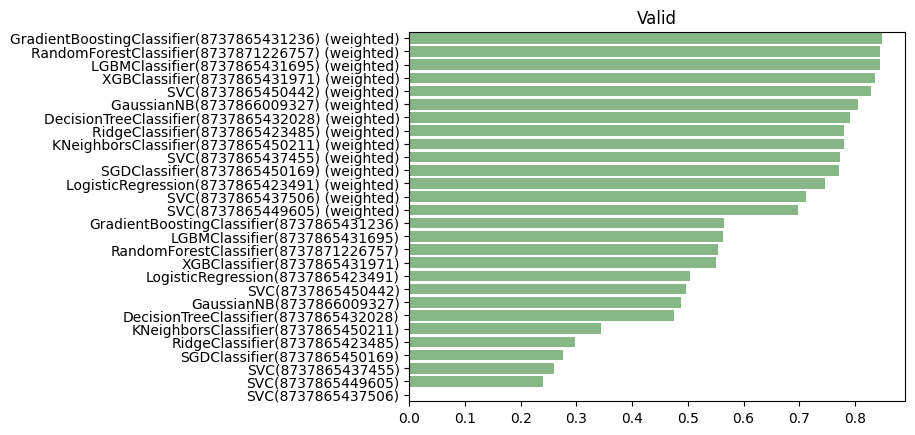

In [67]:
sns.barplot(model_results_train_no_outliers_sorted, orient="h", alpha=0.5, color='blue')
plt.title('Train')
plt.show()
sns.barplot(model_results_test_no_outliers_sorted, orient="h", alpha=0.5, color='orange')
plt.title('Test')
plt.show()
sns.barplot(model_results_valid_no_outliers_sorted, orient="h", alpha=0.5, color='green')
plt.title('Valid')
plt.show()


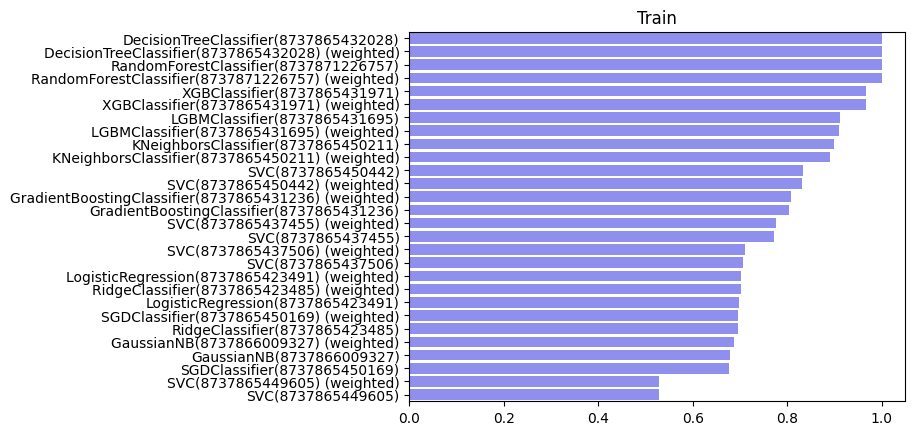

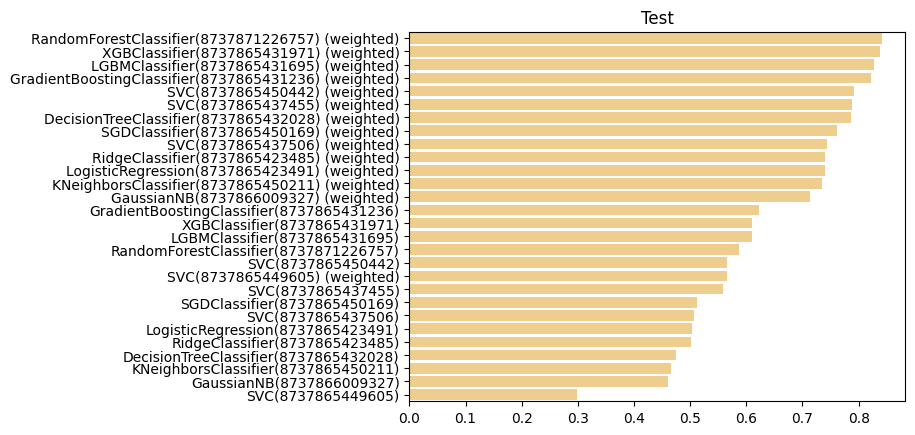

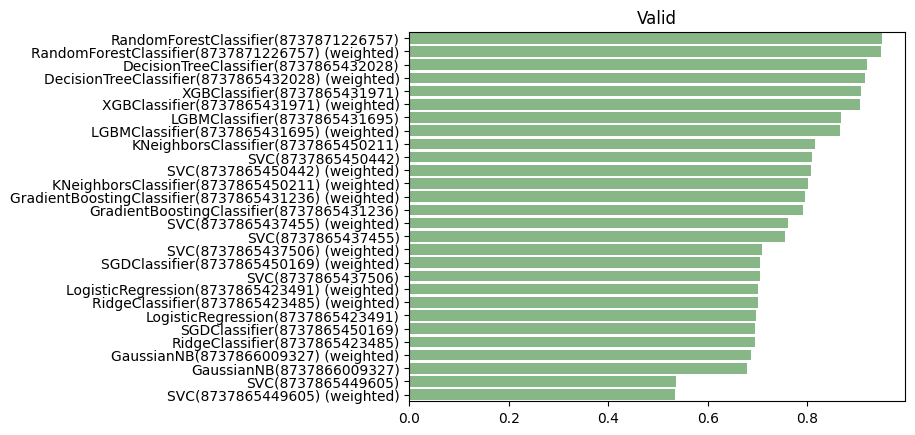

In [68]:
sns.barplot(model_results_train_resampled_sorted, orient="h", alpha=0.5, color='blue')
plt.title('Train')
plt.show()
sns.barplot(model_results_test_resampled_sorted, orient="h", alpha=0.5, color='orange')
plt.title('Test')
plt.show()
sns.barplot(model_results_valid_resampled_sorted, orient="h", alpha=0.5, color='green')
plt.title('Valid')
plt.show()


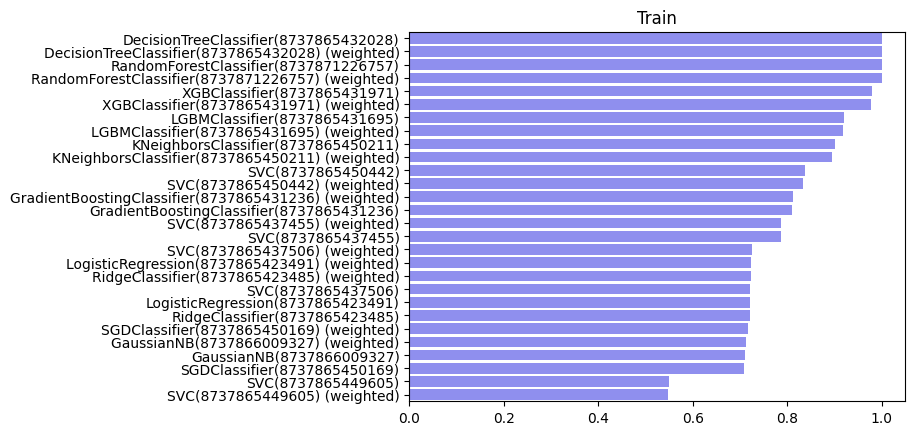

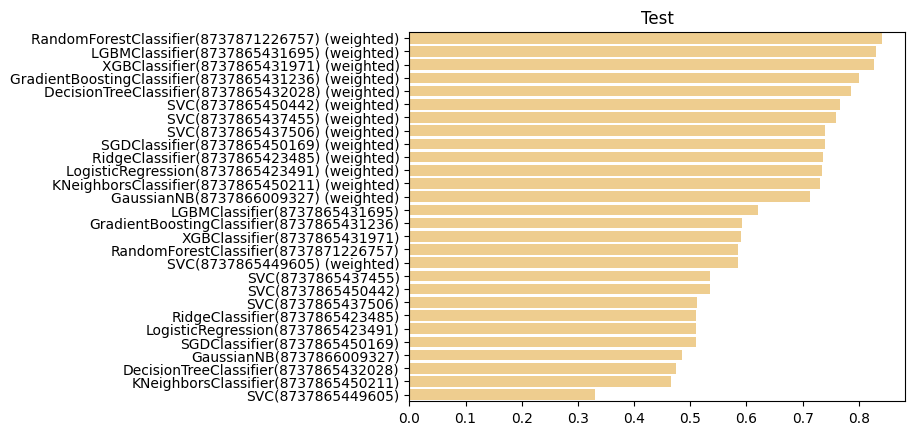

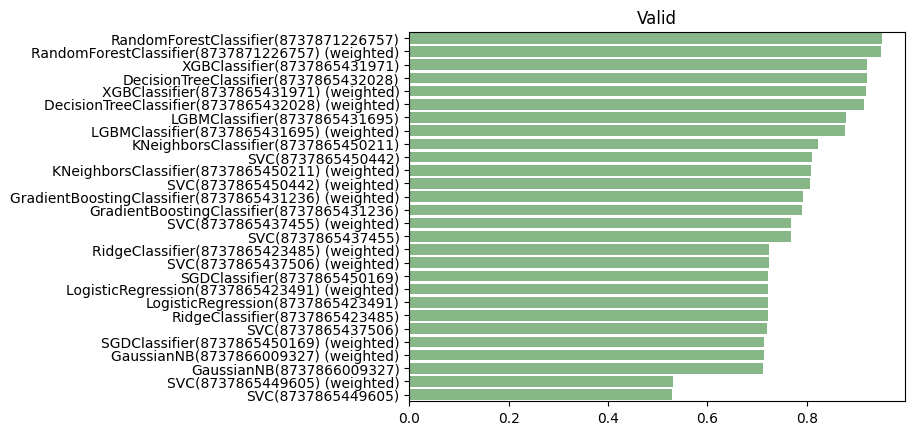

In [69]:
sns.barplot(model_results_train_no_outliers_resampled_sorted, orient="h", alpha=0.5, color='blue')
plt.title('Train')
plt.show()
sns.barplot(model_results_test_no_outliers_resampled_sorted, orient="h", alpha=0.5, color='orange')
plt.title('Test')
plt.show()
sns.barplot(model_results_valid_no_outliers_resampled_sorted, orient="h", alpha=0.5, color='green')
plt.title('Valid')
plt.show()


It appears that GradientBoostingClassifier has got best results for non-oversampled tests.

Meanwhile, simple RandomForestClassifier is doing the best on oversampled train dataset for weighted f1, and LGBM for simple f1.

<Axes: >

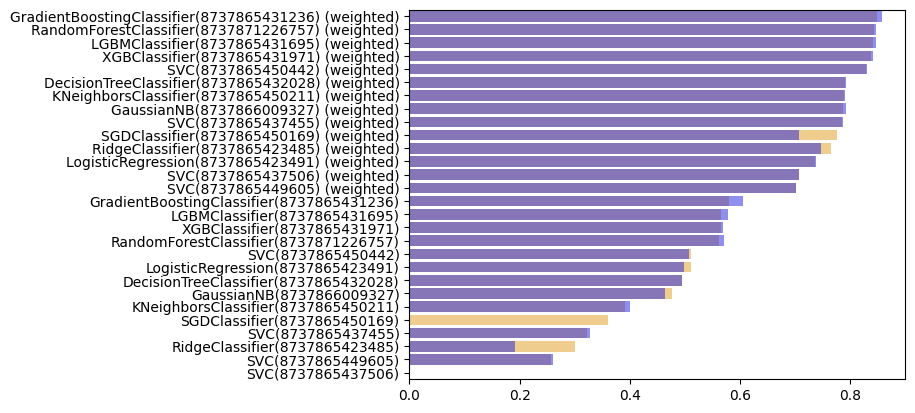

In [70]:
sns.barplot(model_results_test_no_outliers_sorted, orient="h", alpha=0.5, color='orange')
sns.barplot(model_results_test_sorted, orient="h", alpha=0.5, color='blue')


<Axes: >

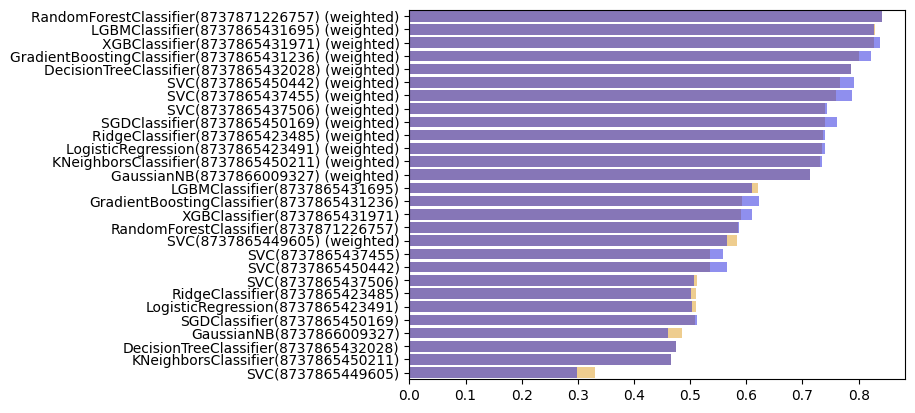

In [71]:
sns.barplot(model_results_test_no_outliers_resampled_sorted, orient="h", alpha=0.5, color='orange')
sns.barplot(model_results_test_resampled_sorted, orient="h", alpha=0.5, color='blue')


From results, removing outliers actually made things worse for normal dataset, and slightly better for oversampled one.

<Axes: >

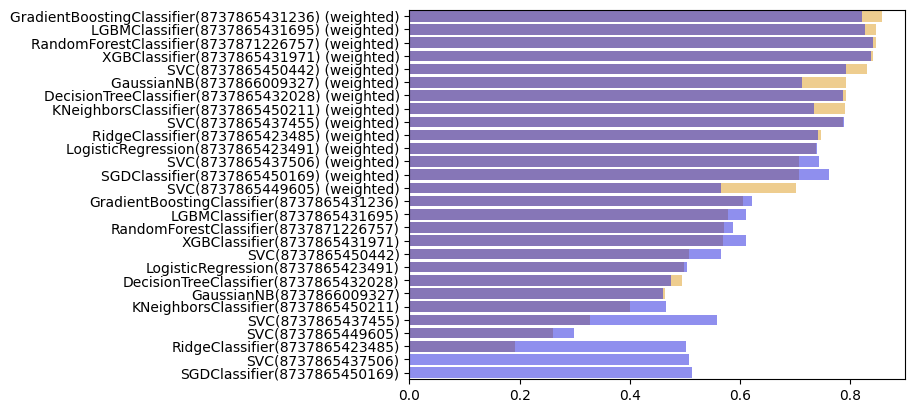

In [72]:
sns.barplot(model_results_test_sorted, orient="h", alpha=0.5, color='orange')
sns.barplot(model_results_test_resampled_sorted, orient="h", alpha=0.5, color='blue')


<Axes: >

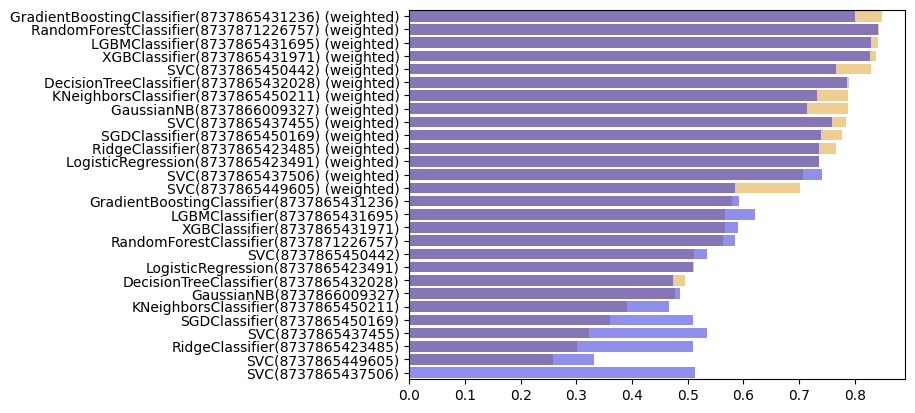

In [73]:
sns.barplot(model_results_test_no_outliers_sorted, orient="h", alpha=0.5, color='orange')
sns.barplot(model_results_test_no_outliers_resampled_sorted, orient="h", alpha=0.5, color='blue')


Generally, resampling dataset made for better score.

So, in the end, we would choose resampled dataset, without removing outliers from train data, with GradientBoostingClassifier being top model, but we can also use LightGBM if we pursue speed.

In [76]:
best_models = {
    'no_outliers' : model_results_test_no_outliers_sorted["GradientBoostingClassifier(8737865431236)"],
    'no_outliers_resampled' : model_results_test_no_outliers_resampled_sorted["GradientBoostingClassifier(8737865431236)"],
    'resampled' : model_results_test_resampled_sorted["GradientBoostingClassifier(8737865431236)"],
    'normal' : model_results_test_sorted["GradientBoostingClassifier(8737865431236)"],
    'no_outliers (weighted)' : model_results_test_no_outliers_sorted["GradientBoostingClassifier(8737865431236) (weighted)"],
    'no_outliers_resampled (weighted)' : model_results_test_no_outliers_resampled_sorted["GradientBoostingClassifier(8737865431236) (weighted)"],
    'resampled (weighted)' : model_results_test_resampled_sorted["GradientBoostingClassifier(8737865431236) (weighted)"],
    'normal (weighted)' : model_results_test_sorted["GradientBoostingClassifier(8737865431236) (weighted)"],
}

best_models_sorted = dict(sorted(best_models.items(), key=lambda item: item[1], reverse=True))



<Axes: >

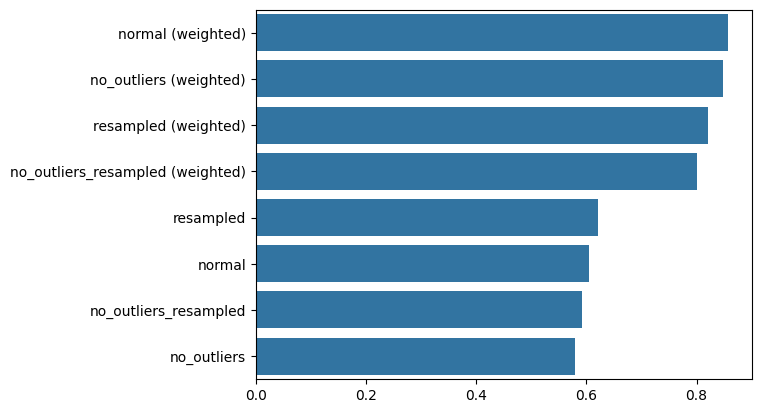

In [77]:
sns.barplot(best_models_sorted, orient="h")


In a context of using GradientBoostingClassifier, and considering we were tasked to use **F1-score** specifically, we will use resampled dataset.

## By the way, what about feature importance?

In [79]:
!pip install shap
import shap

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
feature_names = df_test.drop(columns=["Exited"]).columns
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.6 MB/s eta 0:00:00


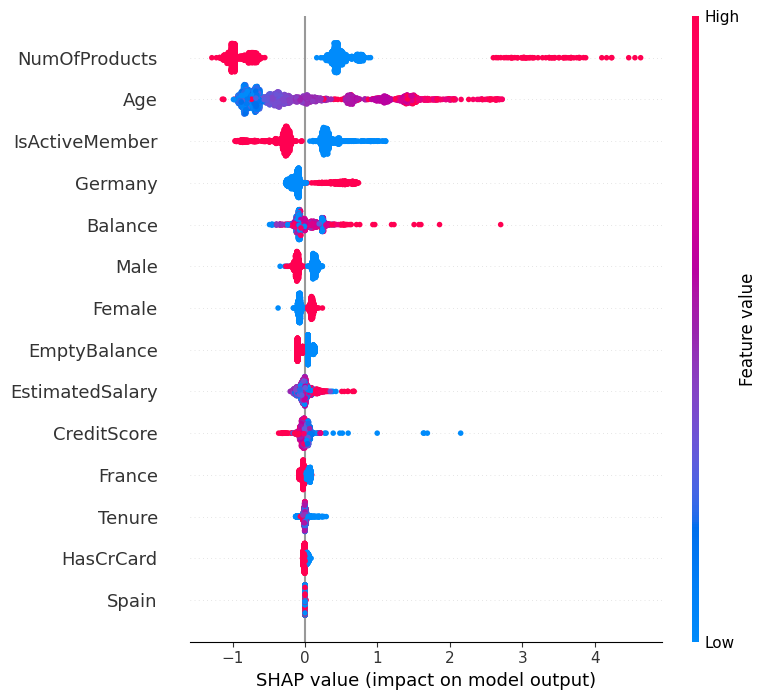

In [80]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


It seems like the NumberOfProducts has a significant effect on the end result... Then comes Age, IsActiveMember and Balance, CreditScore, etc...

We can notice that with Age chance to exit grows, as noticed before. And being an active member lowers that chance. Higher balance seems to motivate people to quit, and the same for low credit score.

### Let's tune hyperparameters for the best one.

In [81]:
# baseline
model = GradientBoostingClassifier(random_state=42)
cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted').mean()


0.8492051560342017

In [83]:
!pip install optuna
import optuna
from lightgbm.sklearn import LGBMClassifier

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 550, 600),
        'learning_rate': trial.suggest_float('learning_rate',0.85, 1),
        'max_depth' : trial.suggest_int('max_depth', 3, 50),
    }

    model = GradientBoostingClassifier(random_state=42, **param)
    score = cross_val_score(model, X_resampled_train, y_resampled_train, cv=cv, scoring='f1').mean()

    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

# Best parameters and score
best_params = study.best_params
best_value = study.best_value

print("Best parameters:", best_params)
print("Best value:", best_value)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


[I 2024-09-19 12:38:32,246] A new study created in memory with name: no-name-b50ade45-eabb-4815-948f-5779b832ea9b


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-09-19 12:38:57,564] Trial 0 finished with value: 0.9234417393495841 and parameters: {'n_estimators': 580, 'learning_rate': 0.9928065500919864, 'max_depth': 48}. Best is trial 0 with value: 0.9234417393495841.
[I 2024-09-19 12:39:24,998] Trial 2 finished with value: 0.9233056749241427 and parameters: {'n_estimators': 569, 'learning_rate': 0.8716892186896745, 'max_depth': 29}. Best is trial 0 with value: 0.9234417393495841.
[I 2024-09-19 12:39:37,160] Trial 1 finished with value: 0.9542177761985016 and parameters: {'n_estimators': 583, 'learning_rate': 0.951272509536829, 'max_depth': 11}. Best is trial 1 with value: 0.9542177761985016.
[I 2024-09-19 12:39:51,573] Trial 3 finished with value: 0.9227925834392907 and parameters: {'n_estimators': 576, 'learning_rate': 0.9523013248324304, 'max_depth': 47}. Best is trial 1 with value: 0.9542177761985016.
[I 2024-09-19 12:40:04,062] Trial 4 finished with value: 0.9235818493442629 and parameters: {'n_estimators': 552, 'learning_rate': 0.

In [84]:
best_params, best_value


({'n_estimators': 565, 'learning_rate': 0.8556550781381363, 'max_depth': 15},
 0.9585585813860835)

Theoretically, we could also tune other good models to see if they surpass that result, but we're running out of time already.

In [85]:
from sklearn.metrics import classification_report

model = GradientBoostingClassifier(**best_params, random_state=42)
test_model(model, test_outliers=False, test_resampled=True)

model.fit(X_resampled_train, y_resampled_train)
print(classification_report(y_test, model.predict(X_test), digits=4, zero_division=0))


f1 train score: 1.0000
f1 weighted train score: 1.0000
f1 test score: 0.5543
f1 weighted test score: 0.8363
f1 validation score: 0.5499
f1 weighted validation score: 0.8361

f1 train score (resampled): 1.0000
f1 weighted train score (resampled): 1.0000
f1 test score (resampled): 0.5430
f1 weighted test score (resampled): 0.8347
f1 validation score (resampled): 0.9586
f1 weighted validation score (resampled): 0.9578

              precision    recall  f1-score   support

           0     0.8698    0.9523    0.9092      1593
           1     0.7031    0.4423    0.5430       407

    accuracy                         0.8485      2000
   macro avg     0.7865    0.6973    0.7261      2000
weighted avg     0.8359    0.8485    0.8347      2000



### Results?...

We achieved 83% accuracy (F1) for the test data, which was chosen randomly, but also 96% accuracy (F1) for cross-validation (5 folds).

We used oversampling to balance classes, improving from 83% (F1 weighted) or 54% (F1) to 96% for both.

# Save

In [86]:
import joblib

joblib.dump(model, 'model.jblb')


['model.jblb']

# Conclusions

### 1. Conduct short exploratory data analysis geared towards understanding variables needed for modeling - please provide at least 2 visualizations of your choice visualizing the most important aspects;

- This is a dataset of 10,000 rows.
- No missing values.
- Class imbalance.
- There are some outliers visible. Model works better leaving them in.
- Data is close to normally distributed.
- RowNumber, CustomerId, Surname columns have unique or useless values and can be removed.
- Exited is a target column, and it has class imbalance.
- There are outliers in Age, Balance and CreditScore features. They can be removed, but model works better leaving them in.
- There are some correlations between features Age, Balance, Geography, Gender and IsActiveMember with Exited, and some negative correlation between Balance and NumOfProducts.
- People who exited are slightly older and have a slightly higher balance than others.

<Axes: title={'center': 'Exited'}, ylabel='count'>

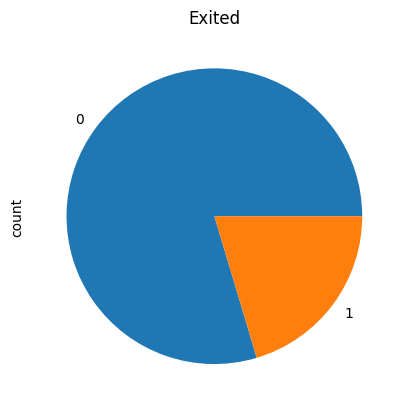

In [87]:
# class imbalance
data["Exited"].value_counts().plot(kind="pie", title="Exited") # plot distribution of target variable


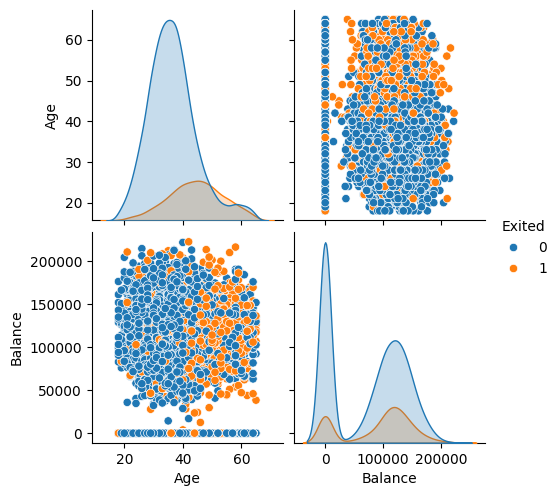

In [88]:
# obvious correlations
sns.pairplot(data[["Age", "Balance", "Exited"]], hue="Exited", diag_kind="kde")


### 2. Conduct data preprocessing and feature engineering;

- We can see that there is a significant number of people with 0.0 balance. We made it a new feature "EmptyBalance".
- We encoded Geography and Gender with onehot encoding.
- We created a copy of dataset without outliers for testing.
- We split and Scaled the data with MinMaxScaler.
- We oversampled the train data to deal with class imbalance.

### 3. Build a ML model to predict whether a client will leave the bank. The accuracy metric shall be F1-score. Check the F1-score on a test sample (20% of the dataset) yourself

- We testes a lot of different models and chose the best one.
- We trained a model using scikit-learn classifier 'GradientBoostingClassifier'.  
- We tuned hyperparameters until we got 95% accuracy at F1 score in cross-validation mean.
- We tested it on test data and got 83%, that might be due to bad split, or maybe some overfitting.

### 4. Discover the most important features that indicate a client will churn;

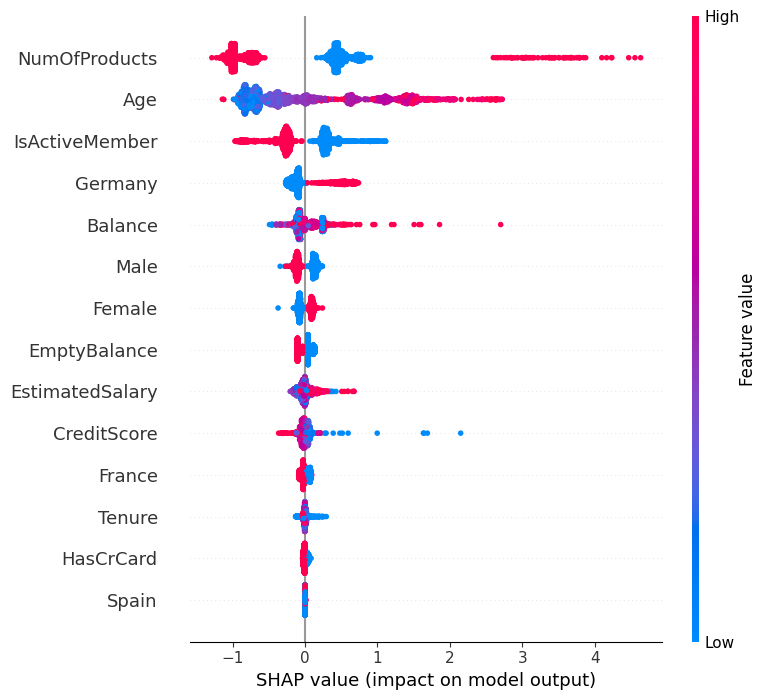

In [89]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


- Features like NumberOfProducts, Age, IsActiveMember, Balance and CreditScore have the highest contribution to the model.

- We can notice that with Age chance to exit grows, as noticed before.
- And being an active member lowers that chance.
- Higher balance seems to motivate people to quit.
- Same for low credit score.